# T4SG Data Science Starter Project - Data Exploration, Manipulation, and Cleaning

### [Table of contents](#top)
- **1** [Setup](#part1)
- **2** [Data Exploration](#part2)
- **3** [Data Manipulation](#part3)
- **4** [Data Cleaning](#part4)

## Setup <a id='part1'></a>

If you haven't already, make sure to setup your kernel & t4sg environment using the 't4sg-notebook-setup.ipynb' guide. Before running this notebook, make sure to activate your T4SG environment and select the 't4sg' kernel. First, we will be installing several Python libaries. The primary libraries that we'll be using are:

* **numpy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

In [29]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration <a id='part2'></a>

The first step is to look at the data we're working with to better understand its properties. Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a Pandas DataFrame and explore some properties of the dataset. For this starter project, we are using an example dataset on irises, but this should be replaced by the relevant project dataset.

In [30]:
import pandas as pd

# Reads in data from working directory (folder in top right), can read in from anywhere if full path is the pd.read_csv()
data = pd.read_csv('data/iris-data.csv')

Below are some common Pandas functions that give us an overall description of the data.

In [31]:
# Returns the first x number of rows when head(num). Without an argument it returns 5
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
# Returns the last x number of rows when tail(num). Without an argument it returns 5
data.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [33]:
# Basic information on all columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
# Gives basic statistics on numeric columns
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It's also important for us to look for missing data. Below are some common Pandas functions that allow us to do so.

In [35]:
# Shows which values are null
data.isnull()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [36]:
# Shows which columns have null values
data.isnull().any()

sepal_length_cm    False
sepal_width_cm     False
petal_length_cm    False
petal_width_cm      True
class              False
dtype: bool

In [37]:
# Shows for each column the percentage of null values 
data.isnull().sum() / data.shape[0]

sepal_length_cm    0.000000
sepal_width_cm     0.000000
petal_length_cm    0.000000
petal_width_cm     0.033333
class              0.000000
dtype: float64

We can also tell pandas to automatically identify missing values if it knows our missing value marker.

In [38]:
data = pd.read_csv('data/iris-data.csv', na_values=['NA'])

## Data Manipulation <a id='part3'></a>

Throughout our data science project pipeline, we also may need to manipulate or change the dataframe in various ways. In this section, we will introduce some common data manipulation functions of Pandas.

In [39]:
# 1. Selecting columns
print("Selecting specific columns:")
print(data[['sepal_length_cm', 'sepal_width_cm']])

# 2. Filtering rows
print("\nFiltering rows where sepal_length_cm > 6:")
print(data[data['sepal_length_cm'] > 6])

# 3. Adding a new column
data['sepal_area'] = data['sepal_length_cm'] * data['sepal_width_cm']
print("\nAdded a new column 'sepal_area':")
print(data.head())

# 4. Grouping and aggregating
print("\nMean values grouped by class:")
print(data.groupby('class').mean())

# 5. Sorting
print("\nSorting by petal_length_cm in descending order:")
print(data.sort_values('petal_length_cm', ascending=False).head())

# 6. Renaming columns
data = data.rename(columns={'sepal_length_cm': 'sepal_length', 'sepal_width_cm': 'sepal_width'})
print("\nRenamed columns:")
print(data.columns)

# 7. Handling missing values
print("\nFilling missing values with mean of the column:")
data['petal_width_cm'] = data['petal_width_cm'].fillna(data['petal_width_cm'].mean())
print(data['petal_width_cm'].isnull().sum())


Selecting specific columns:
     sepal_length_cm  sepal_width_cm
0                5.1             3.5
1                4.9             3.0
2                4.7             3.2
3                4.6             3.1
4                5.0             3.6
..               ...             ...
145              6.7             3.0
146              6.3             2.5
147              6.5             3.0
148              6.2             3.4
149              5.9             3.0

[150 rows x 2 columns]

Filtering rows where sepal_length_cm > 6:
     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
50               7.0             3.2              4.7             1.4   
51               6.4             3.2              4.5             1.5   
52               6.9             3.1              4.9             1.5   
54               6.5             2.8              4.6             1.5   
56               6.3             3.3              4.7             1.6   
58               6.6   

## Data Cleaning <a id='part4'></a>

Next, let's look more specifically at how we can clean the data and deal with duplicates, missingness, and outliers with Pandas functions.

First, we look at how to check for duplicates in the data and how to remove these duplicates based on different criteria (keeping first occurrence, last occurrence, or based on specific columns). 

In [40]:
# 1. Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# 2. View duplicate rows
print("\nDuplicate rows:")
print(data[data.duplicated(keep=False)])

# 3. Remove duplicates, keeping the first occurrence
data_no_duplicates = data.drop_duplicates()

print("\nShape of data before removing duplicates:", data.shape)
print("Shape of data after removing duplicates:", data_no_duplicates.shape)

# 4. Remove duplicates, keeping the last occurrence
# data_no_duplicates = data.drop_duplicates(keep='last')

# 5. Remove duplicates based on specific columns
# data_no_duplicates = data.drop_duplicates(subset=['sepal_length', 'sepal_width', 'petal_length_cm', 'petal_width_cm'])

# 6. Reset index after removing duplicates
data_no_duplicates = data_no_duplicates.reset_index(drop=True)

print("\nFirst few rows of data after removing duplicates:")
print(data_no_duplicates.head())


Number of duplicate rows: 2

Duplicate rows:
     sepal_length  sepal_width  petal_length_cm  petal_width_cm  \
34            4.9          3.1              1.5             0.1   
37            4.9          3.1              1.5             0.1   
101           5.8          2.7              5.1             1.9   
142           5.8          2.7              5.1             1.9   

              class  sepal_area  
34      Iris-setosa       15.19  
37      Iris-setosa       15.19  
101  Iris-virginica       15.66  
142  Iris-virginica       15.66  

Shape of data before removing duplicates: (150, 6)
Shape of data after removing duplicates: (148, 6)

First few rows of data after removing duplicates:
   sepal_length  sepal_width  petal_length_cm  petal_width_cm        class  \
0           5.1          3.5              1.4             0.2  Iris-setosa   
1           4.9          3.0              1.4             0.2  Iris-setosa   
2           4.7          3.2              1.3             0.2 

Next, let's look at some ways to deal with missingness in the data. Below, we show how to drop rows with any missing values, drop columns with missing values above some threshold, and fill missing values with mean, median, mode, etc. (imputation). Not all of these methods will be used together when data cleaning; choose that best suits your data and analysis requirements.

In [44]:
# 1. Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# 2. Dropping missing values
# a. Drop rows with any missing values
data_dropped = data.dropna()
print("\nShape after dropping rows with missing values:", data_dropped.shape)

# b. Drop columns with missing values (if more than 50% are missing)
threshold = len(data) * 0.5
data_dropped_columns = data.dropna(axis=1, thresh=threshold)
print("Shape after dropping columns with >50% missing values:", data_dropped_columns.shape)

# 3. Filling missing values (imputation)
# a. Fill with a specific value
data_filled = data.fillna(0)

# b. Fill with mean for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_filled_mean = data.copy()
data_filled_mean[numeric_columns] = data_filled_mean[numeric_columns].fillna(data[numeric_columns].mean())

# c. Fill with median for numeric columns
data_filled_median = data.copy()
data_filled_median[numeric_columns] = data_filled_median[numeric_columns].fillna(data[numeric_columns].median())

# d. Fill with mode
data_filled_mode = data.fillna(data.mode().iloc[0])

# e. Fill with forward fill (use previous value)
data_filled_ffill = data.fillna(method='ffill')

# f. Fill with backward fill (use next value)
data_filled_bfill = data.fillna(method='bfill')

# 6. Handle non-numeric 'class' column separately
data['class'] = data['class'].fillna(data['class'].mode()[0])

print("\nMissing values after handling:")
print(data.isnull().sum())

# Note: Choose the method that best suits your data and analysis requirements


Missing values in each column:
sepal_length       0
sepal_width        0
petal_length_cm    0
petal_width_cm     0
class              0
sepal_area         0
dtype: int64

Shape after dropping rows with missing values: (150, 6)
Shape after dropping columns with >50% missing values: (150, 6)

Missing values after handling:
sepal_length       0
sepal_width        0
petal_length_cm    0
petal_width_cm     0
class              0
sepal_area         0
dtype: int64


/var/folders/xp/ycg8s5194736y0vn0h3_t5dm0000gn/T/ipykernel_97137/4054327606.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_ffill = data.fillna(method='ffill')
/var/folders/xp/ycg8s5194736y0vn0h3_t5dm0000gn/T/ipykernel_97137/4054327606.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_bfill = data.fillna(method='bfill')


In this section, we perform outlier detection and handling. First, we identify outliers using the Interquartile Range method (defining outliers as data points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where IQR = Q3 - Q1). This definition of outlier can be changed based on data and analysis requirements. Then, we visualize the outliers with a boxplot. Then, to handle the outliers, we either remove rows containing outliers from the dataset or replace outlier values with the lower or upper bounds. Once again, choose an outlier definition and method to handle outliers that best suits your data and analysis requirements.


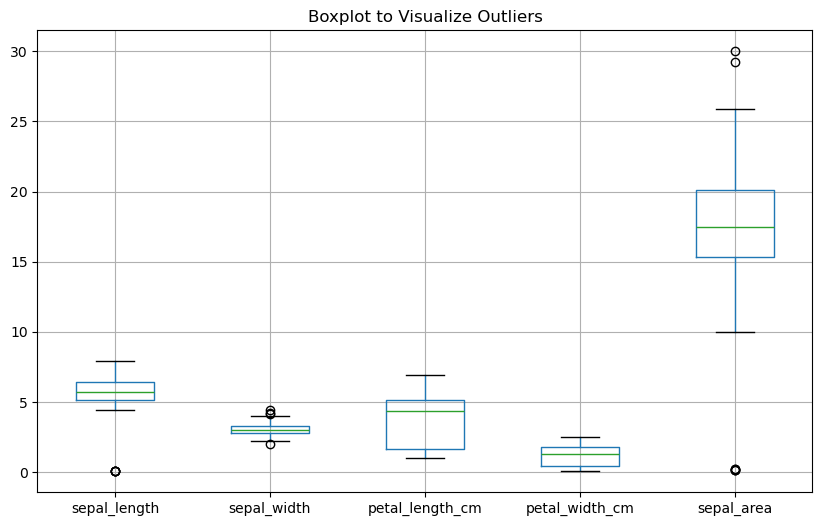

Number of outliers in each column:
sepal_length       5
sepal_width        4
petal_length_cm    0
petal_width_cm     0
sepal_area         7
dtype: int64

Shape after removing outliers: (139, 6)

Shape after capping outliers: (150, 6)


In [45]:
# 1. Identify outliers using Interquartile Range (IQR) method
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# 2. Visualize outliers with a boxplot
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplot to Visualize Outliers')
plt.show()

# 3. Handle outliers

# a. Remove outliers
def remove_outliers(data, columns):
    for col in columns:
        outliers = identify_outliers(data[col])
        data = data[~outliers]
    return data

# b. Cap outliers
def cap_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.clip(data[col], lower_bound, upper_bound)
    return data

# Example usage
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Identify outliers
outliers = identify_outliers(data[numeric_columns])
print("Number of outliers in each column:")
print(outliers.sum())

# Remove outliers
data_removed_outliers = remove_outliers(data.copy(), numeric_columns)
print("\nShape after removing outliers:", data_removed_outliers.shape)

# Cap outliers
data_capped_outliers = cap_outliers(data.copy(), numeric_columns)
print("\nShape after capping outliers:", data_capped_outliers.shape)

# Note: Choose the method that best suits your data and analysis requirements

